# Trabajo Computacional 3

In [2]:
#import sys
#sys.path.append('/home/lucia/.local/lib/python2.7/site-packages')

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors
import numpy as np
from  collections  import defaultdict
from scipy import optimize
import os
from lectura import ldata
import community
import rpy2.robjects as robjects
#import robjects as robjects


/usr/local/lib/python3.5/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [2]:
# El directorio que vamos a usar en cada lectura de datos de ahora en mas
directorio = os.path.dirname(os.path.realpath("dolphins.txt"))

In [3]:
fnDOL = os.path.join(directorio,'dolphins.gml')
delfines = nx.read_gml(fnDOL)
generos=ldata('dolphinsGender.txt')

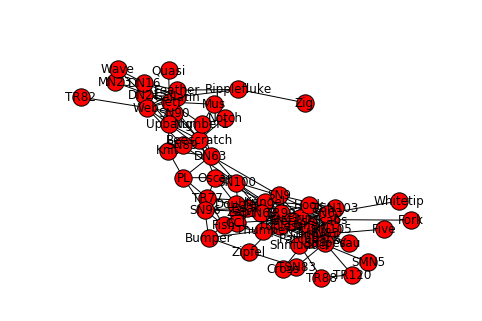

In [4]:
nx.draw(delfines, with_labels=True)
plt.show()

In [5]:
#delfines.edges

Encuentre la partición en clusters de esta red utilizando la metodología Louvain, infomap,fast_greedy y edge_betweenness. Visualice los resultados gráficamente.

In [5]:
def community(nxG, algorithm, fig_name = "G"):
    """
    In:
        nxG: grafo de networkx.
        algorithm: string, entre las siguientes opciones: 
            fast_greedy
            edge_betweenness
            louvain
            infomap
        fig_name: nombre de la figura que se genera al clsuterizar. Le agrega automaticamente el nombre del algoritmo usado y el nombre del grafo si lo tuviere
    Out:
        labels: numpy array con la pertenencia de cada nodo al cluster.
    
    """
    gml_file_name = "G.gml"
    fig_name += "_"+nxG.name+"_"+algorithm+".svg"
    nx.write_gml(nxG, gml_file_name)
    
    igG = robjects.r('''
        f <- function(file, algorithm, fig_name){
            require("igraph")     
            
            G <- read_graph(file, "gml")
            #format = c("edgelist", "pajek", "ncol", "lgl", "graphml","dimacs", "graphdb", "gml", "dl"), ...)
            
            if(algorithm == "fast_greedy"){
                c <- cluster_fast_greedy(G, 
                    merges = TRUE, 
                    modularity = TRUE, 
                    membership = TRUE)
            }
            
            if(algorithm == "edge_betweenness"){
                c <- cluster_edge_betweenness(G,directed = FALSE,edge.betweenness = TRUE)
            }
            
            if(algorithm == "louvain"){
                c <- cluster_louvain(G)
            }
            
            if(algorithm == "infomap"){
                c <- cluster_infomap(G)
            }
            
            svg(fig_name)
            plot(c, G)
            dev.off()
            
            return(membership(c))
        }
    ''')
    
    labels = igG(gml_file_name, algorithm, fig_name)
    os.remove(gml_file_name)
    return np.array(labels)

In [7]:
labels_fastgreedy = community(delfines,"fast_greedy")
labels_bet = community(delfines,"edge_betweenness")
labels_louvain = community(delfines,"louvain")
labels_infomap = community(delfines,"infomap")

/home/alang/.local/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: igraph

  warnings.warn(x, RRuntimeWarning)
/home/alang/.local/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
Attaching package: ‘igraph’


  warnings.warn(x, RRuntimeWarning)
/home/alang/.local/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    decompose, spectrum


  warnings.warn(x, RRuntimeWarning)
/home/alang/.local/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following object is masked from ‘package:base’:

    union


  warnings.warn(x, RRuntimeWarning)


In [6]:
labels_bet

NameError: name 'labels_bet' is not defined

[1.0, 2.0, 2.0, 1.0, 4.0, 3.0, 1.0, 2.0, 2.0, 3.0, 2.0, 1.0, 3.0, 2.0, 1.0, 3.0, 3.0, 3.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 1.0, 4.0, 1.0, 2.0, 3.0, 3.0, 2.0, 4.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 5.0, 2.0, 3.0, 4.0, 2.0, 3.0, 4.0, 1.0, 5.0, 3.0, 1.0, 4.0, 1.0, 4.0, 1.0, 3.0, 3.0, 3.0, 2.0]


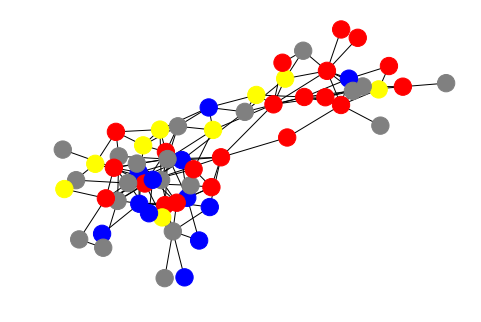

In [135]:
comunidades = dict()

for d,i in zip(delfines,labels_bet):
    comunidades[d]=i
    
nx.set_node_attributes(delfines, comunidades, 'edge_betweenness')
nx.draw(delfines,node_color=["blue" if g==1.0 else "red" if g==2.0 else "grey" if g==3.0 else "yellow" for g in nx.get_node_attributes(delfines,"edge_betweenness").values()],)
print (nx.get_node_attributes(delfines, 'edge_betweenness').values())

[3.0, 1.0, 1.0, 3.0, 2.0, 2.0, 3.0, 1.0, 1.0, 3.0, 1.0, 3.0, 4.0, 1.0, 3.0, 2.0, 2.0, 2.0, 3.0, 1.0, 1.0, 1.0, 4.0, 1.0, 2.0, 1.0, 3.0, 2.0, 3.0, 1.0, 2.0, 2.0, 1.0, 2.0, 3.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 3.0, 2.0, 2.0, 3.0, 1.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 1.0]


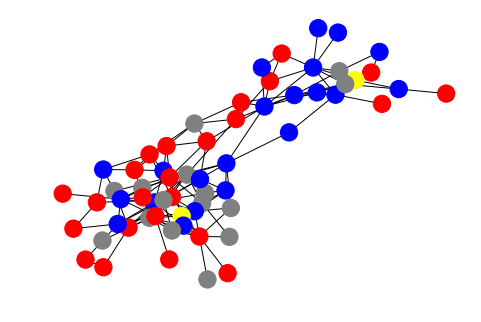

In [136]:
comunidades = dict()

for d,i in zip(delfines,labels_fastgreedy):
    comunidades[d]=i
    
nx.set_node_attributes(delfines, comunidades, 'fastgreedy')
nx.draw(delfines,node_color=["blue" if g==1.0 else "red" if g==2.0 else "grey" if g==3.0 else "yellow" for g in nx.get_node_attributes(delfines,"fastgreedy").values()],)
print (nx.get_node_attributes(delfines, "fastgreedy").values())

[4.0, 1.0, 1.0, 4.0, 3.0, 5.0, 4.0, 1.0, 1.0, 2.0, 1.0, 4.0, 2.0, 1.0, 4.0, 5.0, 5.0, 5.0, 4.0, 1.0, 3.0, 1.0, 2.0, 1.0, 5.0, 1.0, 4.0, 3.0, 4.0, 3.0, 5.0, 5.0, 1.0, 3.0, 2.0, 1.0, 5.0, 5.0, 5.0, 1.0, 1.0, 1.0, 5.0, 5.0, 1.0, 5.0, 3.0, 1.0, 5.0, 3.0, 4.0, 5.0, 5.0, 4.0, 3.0, 4.0, 2.0, 4.0, 5.0, 5.0, 2.0, 1.0]


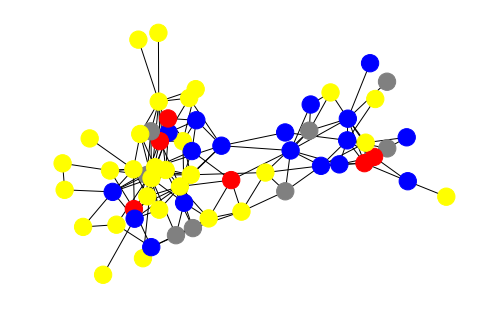

In [138]:
comunidades = dict()

for d,i in zip(delfines,labels_louvain):
    comunidades[d]=i
    
nx.set_node_attributes(delfines, comunidades, 'louvain')
nx.draw(delfines,node_color=["blue" if g==1.0 else "red" if g==2.0 else "grey" if g==3.0 else "yellow" for g in nx.get_node_attributes(delfines,"louvain").values()],)
print (nx.get_node_attributes(delfines, "louvain").values())

[3.0, 1.0, 1.0, 3.0, 4.0, 2.0, 3.0, 1.0, 1.0, 5.0, 1.0, 3.0, 5.0, 1.0, 3.0, 2.0, 2.0, 2.0, 3.0, 1.0, 1.0, 1.0, 5.0, 1.0, 2.0, 1.0, 3.0, 4.0, 3.0, 1.0, 2.0, 2.0, 1.0, 4.0, 5.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 4.0, 1.0, 2.0, 4.0, 3.0, 2.0, 2.0, 3.0, 4.0, 3.0, 4.0, 3.0, 2.0, 2.0, 5.0, 1.0]


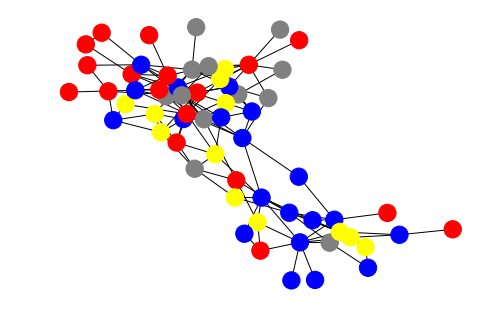

In [139]:
comunidades = dict()

for d,i in zip(delfines,labels_infomap):
    comunidades[d]=i
    
nx.set_node_attributes(delfines, comunidades, 'infomap')
nx.draw(delfines,node_color=["blue" if g==1.0 else "red" if g==2.0 else "grey" if g==3.0 else "yellow" for g in nx.get_node_attributes(delfines,"infomap").values()],)
print (nx.get_node_attributes(delfines, "infomap").values())

In [140]:
#Modularidad
def modularidad(G,atributo):
    Q=0. #modularidad
    TotalEdges=G.number_of_edges()
    for cluster in set(nx.get_node_attributes(G,atributo).values()):
        nodescluster = [x for x,y in G.nodes(data=True) if y[atributo]==cluster]
        L=0.#Cantidad de edges al interior de un cluster 
        a=0.#candidad de posibles edges del cluster
        for nodo1 in nodescluster:
            a=a+G.degree(nodo1)
            for nodo2 in nodescluster:
                if (nodo1,nodo2) in G.edges():
                    L+=1
        Q=Q+(L/(2*TotalEdges)-(a/(2*TotalEdges))**2) #Se suma la modularidad del cluster
    return Q

In [81]:
#Silouethe
def silouethe(G,atributo):
    S={}
    for nodo,atri in G.nodes(data=True):
        dis=nx.diameter(G)

        cluster=atri[atributo]
        nodescluster = [x for x,y in G.nodes(data=True) if y[atributo]==cluster]
        a=np.mean([nx.shortest_path_length(G,nodo,nodo2) for nodo2 in nodescluster])
        b=min([nx.shortest_path_length(G,nodo,nodo2)for nodo2 in G.nodes()-nodescluster])        
        s=(b-a)/max(a,b)
        S[nodo]=s
        
    return np.mean(S.values())

In [144]:
algoritmo='fastgreedy'
print(modularidad(delfines,algoritmo),silouethe(delfines,algoritmo))

(0.4923262529172105, -0.18433650109042726)


In [146]:
algoritmo='edge_betweenness'
print(modularidad(delfines,algoritmo),silouethe(delfines,algoritmo))

(0.5193821446936435, -0.08911370271247908)


In [147]:
algoritmo='louvain'
print(modularidad(delfines,algoritmo),silouethe(delfines,algoritmo))

(0.5188283691309679, -0.17031154350766292)


In [148]:
algoritmo='infomap'
print(modularidad(delfines,algoritmo),silouethe(delfines,algoritmo))

(0.5277283335311103, -0.13895255868942513)


In [205]:
def MatrizConfu(G,atributo1,atributo2):
    M=np.matrix([[0]*len( set(nx.get_node_attributes(G,atributo1).values()))]*len( set(nx.get_node_attributes(G,atributo2).values())))
    for node,atri in G.nodes(data=True):
        i=0
        j=0
        while True:
            if atri[atributo1]==list(set(nx.get_node_attributes(G,atributo1).values()))[i]:
                break
            i+=1
            print(atri[atributo1],list(set(nx.get_node_attributes(G,atributo1).values()))[i])
        while True:
            if atri[atributo2]==list(set(nx.get_node_attributes(G,atributo2).values()))[j]:
                break 
            print(atri[atributo2],list(set(nx.get_node_attributes(G,atributo2).values()))[j])

            j+=1
        print(i,j)

        M[i,j]+=1
    return M

In [156]:
atributo1='fastgreedy'
atributo2='louvain'
G=delfines
M=np.matrix([[0]*len( set(nx.get_node_attributes(G,atributo1).values()))]*len( set(nx.get_node_attributes(G,atributo2).values())))
            

In [206]:
MatrizConfu(G,atributo1,atributo2)

(3.0, 2.0)
(3.0, 3.0)
(4.0, 1.0)
(4.0, 2.0)
(4.0, 3.0)
(2, 3)
(0, 0)
(0, 0)
(3.0, 2.0)
(3.0, 3.0)
(4.0, 1.0)
(4.0, 2.0)
(4.0, 3.0)
(2, 3)
(0, 0)
(2.0, 2.0)
(5.0, 1.0)
(5.0, 2.0)
(5.0, 3.0)
(5.0, 4.0)
(1, 4)


IndexError: index 4 is out of bounds for axis 1 with size 4

In [177]:
(set(nx.get_node_attributes(G,atributo1).values()))

{1.0, 2.0, 3.0, 4.0}

In [207]:
M

matrix([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]])